In [4]:
import tensorflow as tf
import eurostat
import warnings
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from tabulate import tabulate
import missingno as msno

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

warnings.filterwarnings('ignore')

<h1 style="color:black; background-color:white; padding:5px; padding-bottom:10px;text-align: center">Methodology for handling missing values</h1>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">I. Introduction</h2>
<p style="color:black; background-color:white; padding:5px;">
Handling missing data is an important step of any data analysis. In real life, the study of given processes and phenomena inevitably encounters missing data, which should be subject to preliminary analysis. To reveal the nature of the missing data in general, whether they are completely random, random or non-random. To think about what could be done with them so as not to distort the database drastically, but on the contrary to improve their suitability for objective analysis. This report provides an overview of possible tools for dealing with missing data. The emphasis is not on their research, which as a methodology was done in a previous report, but on working with them. Different methods of visualization, padding and removal are shown in order to enrich the theory and practice of data refinement as a pre-processing step in the field of economic data and others.</p>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">II. Theoretical foundations of missing data.</h2>
<p style="color:black; background-color:white; padding:5px; margin-bottom:-15px"><b>Types of Missing data</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">There are four types of missing data:</ul>
<li style="color:black; background-color:white; padding:5px">Missing completely at random (MCAR): The fact that it is missing is independent of the remaining variables.</li>
<li style="color:black; background-color:white; padding:5px">Missing at random (MAR):  The missing value can roughly be interpolated from the remaining values to a reasonable degree of accuracy.</li>
<li style="color:black; background-color:white; padding:5px">Missing not at random (MNAR): The reason why the data is missing is related to the remaining variables</li>
<li style="color:black; background-color:white; padding:5px">Structurally Missing Data: The missing data is missing for а reason.</li>

<p style="color:black; background-color:white; padding:5px;  margin-bottom:-15px"><b>Methods for handling missing data</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">There are three methods at general:</ul>
<li style="color:black; background-color:white; padding:5px">Remove the missing data;</li>
<li style="color:black; background-color:white; padding:5px">Imputatе missing data;</li>
<li style="color:black; background-color:white; padding:5px">Keep the missing values;</li>

<h2 style="color:black; background-color:yellow; padding:5px; margin-bottom:-15px">Content</h2>
<ul style="color:black; background-color:yellow; padding:5px; margin-bottom:-10px">In this step, we familiarize ourselves with the data, its parameters and elements. Basic manipulations will be performed to help us use and better understand the elements to continue the research in the next steps. It includes the following manipulations: </ul>
<li style="color:black; background-color:yellow; padding:5px">loading the databasess</li>
<li style="color:black; background-color:yellow; padding:5px">extraction of uniqueness by features and observations</li>
<li style="color:black; background-color:yellow; padding:5px">extraction basic information about the datas</li>
<li style="color:black; background-color:yellow; padding:5px">dataframe trasnformation: features and rows manipulation and transformation</li>

<h2 style="color:black; background-color:yellow; padding:5px; padding-bottom:10px;">III. Methodology and empirical analysis </h2>
tuk имаме за базата данни от куде е и т.н.

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">1. Import the database</h3>
<p style="color:black; background-color:white; padding:5px;">
As a first step, the database is loaded and functions are executed to reveal the main parameters of the data.</p>

In [5]:
def import_data (**kwargs):
    global key
    for key, value in kwargs.items():
        df_name = key
        globals()[df_name] = eurostat.get_data_df(value)
        return globals()[df_name]

In [6]:
import_data(df_minimum_wage = "earn_mw_cur")

,currency,geo\time,2022S2,2022S1,2021S2,2021S1,2020S2,2020S1,2019S2,2019S1,...,2003S2,2003S1,2002S2,2002S1,2001S2,2001S1,2000S2,2000S1,1999S2,1999S1
0,EUR,AL,268.61,248.43,244.56,242.52,209.10,213.45,211.99,210.66,...,74.40,67.06,67.75,62.78,60.13,52.80,52.36,46.98,45.12,NaN
1,EUR,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUR,BE,1842.28,1658.23,1625.72,1625.72,1625.72,1593.81,1593.81,1593.81,...,1186.31,1163.02,1163.02,1140.24,1140.24,1117.88,1095.89,1095.89,1095.89,1074.44
3,EUR,BG,363.02,332.34,332.34,332.34,311.89,311.89,286.33,286.33,...,56.52,56.28,51.24,51.38,43.65,40.42,38.35,34.26,34.26,31.19
4,EUR,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,PPS,SI,1217.79,1217.79,1160.91,1160.91,1072.77,1072.77,1019.61,1019.61,...,566.74,566.74,534.56,534.56,498.73,498.73,484.59,467.30,449.31,449.31
107,PPS,SK,719.80,719.80,694.18,694.18,645.24,645.24,599.52,599.52,...,261.31,261.31,248.05,248.05,225.39,225.39,202.59,202.59,191.81,159.84
108,PPS,TR,NaN,NaN,NaN,NaN,824.57,824.57,846.59,846.59,...,307.40,307.40,321.06,284.10,303.65,253.10,306.51,283.29,360.90,301.06
109,PPS,UK,NaN,NaN,NaN,NaN,1348.67,1269.79,1284.84,1228.01,...,770.21,770.21,743.46,743.46,681.56,681.56,645.38,645.38,624.35,NaN


In [7]:
def uniques (df):
    print(f"Names of columns (features): \n{df.columns}")
    for col in df:
        if not df[col].dtype == "float" or df[col].dtype == "int":
            print(f"\nElements of columns (observations): \"{col}\": \n {df[col].unique()}")
            print(f"Number of elements of columns (observations): \"{col}\": \n {df[col].unique().size}")

        else:
            pass
    print(f"\nThe unique observation of a feature in which periods are mentioned is not logically applicable at this stage of the analysis")

In [8]:
uniques(df_minimum_wage)

Names of columns (features): 
Index(['currency', 'geo\time', '2022S2', '2022S1', '2021S2', '2021S1',
       '2020S2', '2020S1', '2019S2', '2019S1', '2018S2', '2018S1', '2017S2',
       '2017S1', '2016S2', '2016S1', '2015S2', '2015S1', '2014S2', '2014S1',
       '2013S2', '2013S1', '2012S2', '2012S1', '2011S2', '2011S1', '2010S2',
       '2010S1', '2009S2', '2009S1', '2008S2', '2008S1', '2007S2', '2007S1',
       '2006S2', '2006S1', '2005S2', '2005S1', '2004S2', '2004S1', '2003S2',
       '2003S1', '2002S2', '2002S1', '2001S2', '2001S1', '2000S2', '2000S1',
       '1999S2', '1999S1'],
      dtype='object')

Elements of columns (observations): "currency": 
 ['EUR' 'NAC' 'PPS']
Number of elements of columns (observations): "currency": 
 3

Elements of columns (observations): "geo\time": 
 ['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL'
 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK' 'US']
Number of elem

In [9]:
def db_info (df):
    observations = None
    features = None
    observations, features = df.shape
    print("1. Оbservations and features: \n {} Оbservations and {} features".format(observations, features))
    print("-------------------------------")
    print (f"2. Number of cases in the table: {df.size}")
    print("--------------------------------")
    print(f"3. The sum of element types by type is as follows: \n {df.dtypes.value_counts(ascending=True)}")
    print("--------------------------------")

    list_objects = []
    list_float64 = []

    for col in df.columns:
        if df[col].dtypes == "object":
            list_objects += [col]
        elif df[col].dtypes == "float64":
            list_float64 += [col]
    print("4. Group the features by data type:")
    print(f" object = {list_objects} \n")
    print(f" float64 = {list_float64}")
    print("--------------------------------------------------------------------------------")

    return df.applymap(type).apply(pd.value_counts).fillna(0)

In [10]:
db_info(df_minimum_wage)

1. Оbservations and features: 
 111 Оbservations and 50 features
-------------------------------
2. Number of cases in the table: 5550
--------------------------------
3. The sum of element types by type is as follows: 
 object      2
float64    48
dtype: int64
--------------------------------
4. Group the features by data type:
 object = ['currency', 'geo\\time'] 

 float64 = ['2022S2', '2022S1', '2021S2', '2021S1', '2020S2', '2020S1', '2019S2', '2019S1', '2018S2', '2018S1', '2017S2', '2017S1', '2016S2', '2016S1', '2015S2', '2015S1', '2014S2', '2014S1', '2013S2', '2013S1', '2012S2', '2012S1', '2011S2', '2011S1', '2010S2', '2010S1', '2009S2', '2009S1', '2008S2', '2008S1', '2007S2', '2007S1', '2006S2', '2006S1', '2005S2', '2005S1', '2004S2', '2004S1', '2003S2', '2003S1', '2002S2', '2002S1', '2001S2', '2001S1', '2000S2', '2000S1', '1999S2', '1999S1']
--------------------------------------------------------------------------------


,currency,geo\time,2022S2,2022S1,2021S2,2021S1,2020S2,2020S1,2019S2,2019S1,...,2003S2,2003S1,2002S2,2002S1,2001S2,2001S1,2000S2,2000S1,1999S2,1999S1
<class 'str'>,111.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<class 'float'>,0.0,0.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,...,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0


<p style="color:black; background-color:white; padding:5px;">After we have loaded the data we see that we have two main columns with string format object type. One column marks the unit of measurement and has 3 unique values, and the other the countries and has 37 unique values. In total, there are 111 rows and 50 columns of data. The remaining columns are in numerical format and mark the minimum wage in the period 1999 - 2022.</p>

<p style="color:black; background-color:white; padding:5px;">AWe will make two changes: we will change the direction of the time period and leave only the data related to the unit of measurement: purchasing power parity.</p>

In [11]:
df_minimum_wage = df_minimum_wage[list(df_minimum_wage.columns[:2]) + list(df_minimum_wage.columns[:1:-1])]
df_minimum_wage.head()

,currency,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
0,EUR,AL,NaN,45.12,46.98,52.36,52.80,60.13,62.78,67.75,...,180.52,190.58,210.66,211.99,213.45,209.10,242.52,244.56,248.43,268.61
1,EUR,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUR,BE,1074.44,1095.89,1095.89,1095.89,1117.88,1140.24,1140.24,1163.02,...,1562.59,1562.59,1593.81,1593.81,1593.81,1625.72,1625.72,1625.72,1658.23,1842.28
3,EUR,BG,31.19,34.26,34.26,38.35,40.42,43.65,51.38,51.24,...,260.76,260.76,286.33,286.33,311.89,311.89,332.34,332.34,332.34,363.02
4,EUR,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df_minimum_wage_pps = df_minimum_wage[df_minimum_wage["currency"] == 'PPS']
df_minimum_wage_pps = df_minimum_wage_pps.drop("currency", axis=1)
df_minimum_wage_pps.head()

,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,2003S1,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
74,AL,84.65,93.11,94.29,103.46,102.97,111.50,110.24,136.71,137.98,...,336.47,336.47,363.88,363.88,347.76,347.76,402.45,402.45,402.45,429.28
75,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,BE,950.54,969.51,1004.55,1004.55,1020.93,1041.35,1053.30,1074.34,1061.50,...,1362.77,1362.77,1387.68,1387.68,1399.21,1427.22,1432.92,1432.92,1461.58,1623.80
77,BG,83.00,91.17,89.38,100.05,100.06,107.66,126.34,126.34,140.47,...,502.79,502.79,535.52,535.52,559.40,559.40,597.76,597.76,597.76,652.93
78,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">2. Missing values</h3>
<p style="color:black; background-color:white; padding:5px;">
The purpose of this report is not to analyze missing data and search for patterns. However, there is no way to take steps to handle the missing data without revealing its size and type. This is exactly what is done below, outlining them as a size in absolute and relative value and also outlining their type through a structural matrix.</p>

In [13]:
def missing_values_features(df):
    df_missing = df.isna().sum()
    b = df_missing / len(df)
    df_missing_relative = b.map(lambda n: '{:,.2%}'.format(n))
    print("Missing values")
    missing_all = pd.concat([df_missing, df_missing_relative], axis=1, keys=('Absolute number','Relative number'))

    missing_all.index = missing_all.index.map(str)
    
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,12))
    axes[0].barh(missing_all.index, missing_all["Absolute number"])
    axes[0].set(title='Absolute number')
    axes[0].invert_xaxis()

    axes[0].yaxis.tick_right()

    axes[1].barh(missing_all.index, (b*100), color = "c")
    axes[1].set(title='Relative number')


    axes[0].bar_label(axes[0].barh(missing_all.index, missing_all["Absolute number"]), label_type='center')
    axes[1].bar_label((axes[1].barh(missing_all.index, (b*100))), fmt='%.2f')

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.18)
    plt.show()

Missing values


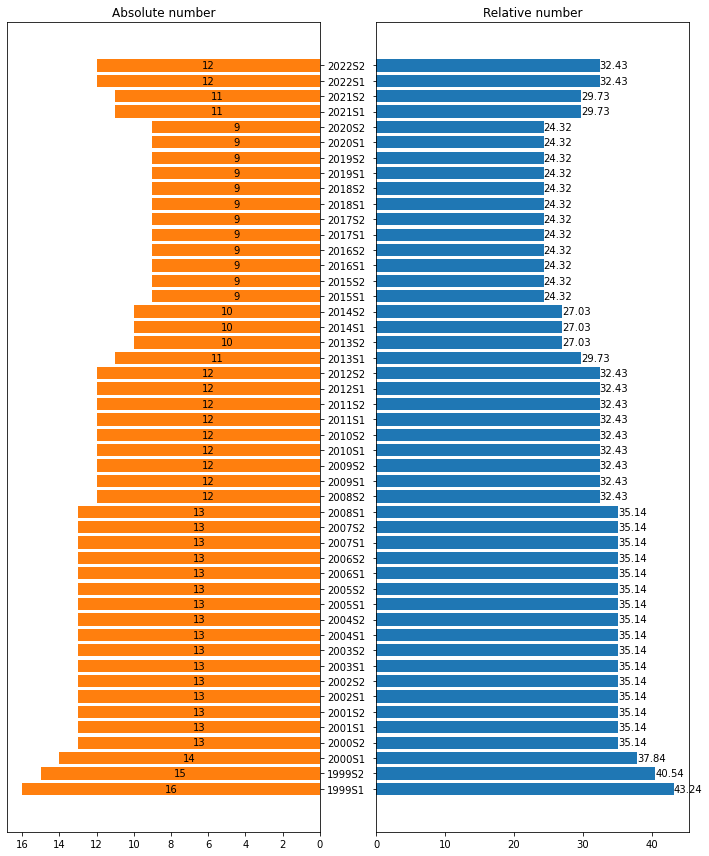

In [98]:
missing_values_features(df_minimum_wage_pps)

<p style="color:black; background-color:white; padding:5px;">As we can see from the missing values plot above, all columns show roughly the same amount of values. They range from 24.32% to 43.24% without the presence of random variations and amplitudes.</p>

<p style="color:black; background-color:white; padding:5px;">Let's look at the missing values in a graphical matrix to see if there are any patterns in the missing values.</p>

<AxesSubplot:>

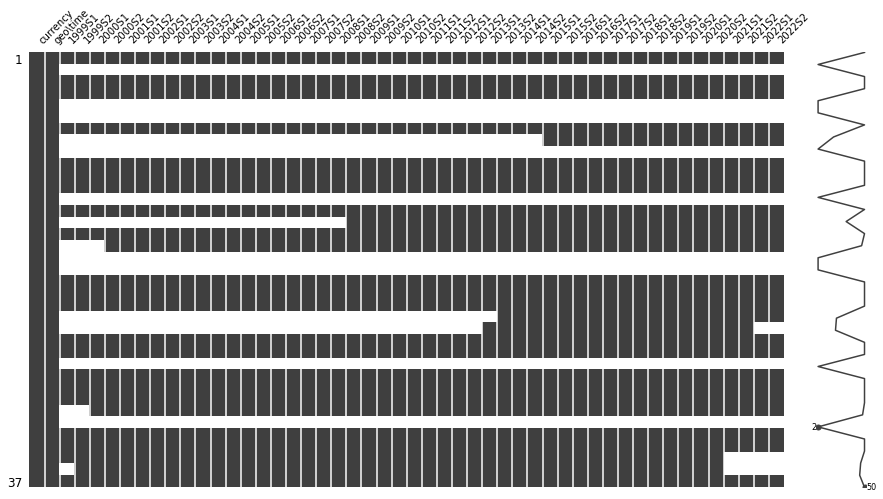

In [15]:
msno.matrix(df_minimum_wage_pps, figsize=(15, 8), fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The matrix shows us that the missing values are not random. On the contrary, certain countries have missing values in certain time periods with a distinct start and end of the period.</p>

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">3. Dealing with missing values</h3>
<p style="color:black; background-color:white; padding:5px;">
The two main approaches to dealing with missing data is to remove or replace it. In this point, we will try to replace them using different methods and find the most accurate one.For this to happen three main steps will be taken. First, a portion of the database with no missing values will be displayed. Second part of the data will be hidden in the form of missing data. Third, different imputation models will be run and the values they suggest will be compared to the actual values.</p>

In [16]:
def missing_part (df, percent):
    results = df.select_dtypes(include=["float"])
    len_results = len(results.columns)
    number = len_results*(percent/100)
    global len_results_notnull

    len_results_notnull = df.loc[df.isnull().sum(1)>=number]
    
    observations_part, features_part = len_results_notnull.shape
    observations, features = df.shape
    obesrvation_relative = 100/(observations/observations_part)
    
    print(f"The database has {len_results} columns(features) with float type datas")
    print(f"The folowing {observations_part} rows have {number:.2f} percent missing values")
    print(f"The part of dataframe with filtered missing values is {obesrvation_relative:.2f} % of the whole database")

    return(len_results_notnull)

In [130]:
missing_part(df_minimum_wage_pps, 1)

The database has 48 columns(features) with float type datas
The folowing 17 rows have 0.48 percent missing values
The part of dataframe with filtered missing values is 45.95 % of the whole database


,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,2003S1,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
75,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1423.70,1423.70,1458.09,1458.09,1444.53,1444.53,1467.86,1483.61,1516.95,1615.11
82,DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,FI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,656.55,656.55,708.62,708.62,761.19,761.19,793.69,793.69,875.40,875.40
90,IE,NaN,NaN,NaN,796.41,773.47,826.05,791.12,791.12,841.42,...,1203.24,1203.24,1220.06,1220.06,1183.50,1219.73,1230.31,1230.31,1266.50,1266.50
91,IS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df_minimum_wage_pps_no_missing = df_minimum_wage_pps.copy()
df_minimum_wage_pps_no_missing.drop(len_results_notnull.index, inplace=True)

<AxesSubplot:>

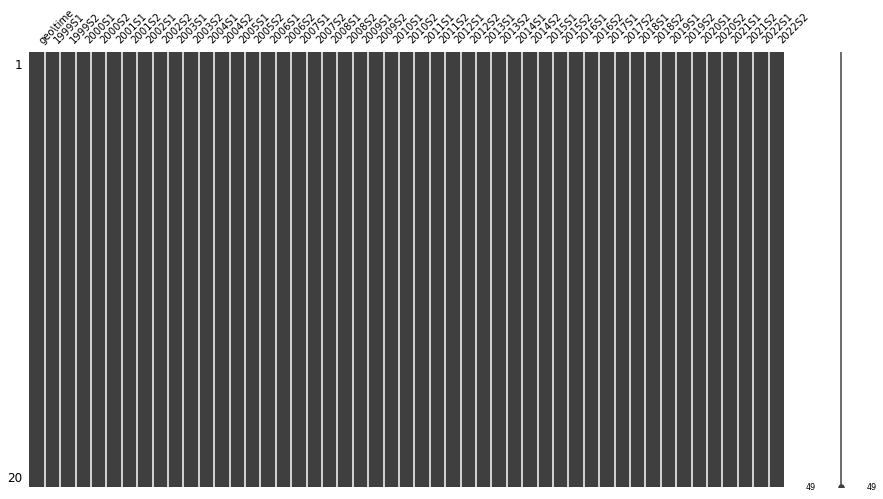

In [132]:
msno.matrix(df_minimum_wage_pps_no_missing, figsize=(15, 8), fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The matrix shows that all missing values have been removed. We have a part of the database that has no missing values and can be used to test and evaluate missing value prediction methods. Since many of the methods will work with the columns, we will also prepare a transposed version of the database.</p>

In [133]:
df_minimum_wage_pps_no_missing_T = df_minimum_wage_pps_no_missing.copy()

In [134]:
df_minimum_wage_pps_no_missing_T.set_index("geo\\time", inplace=True)
df_minimum_wage_pps_no_missing_T = df_minimum_wage_pps_no_missing_T.T

geo\time,AL,BE,BG,CZ,EE,EL,ES,FR,HU,LT,LU,LV,MT,NL,PL,PT,RO,SI,SK,US
1999S1,84.65,950.54,83.00,180.43,133.15,582.03,534.96,914.06,176.53,206.39,1039.97,145.26,631.59,995.41,289.78,433.14,56.20,449.31,159.84,760.92
1999S2,93.11,969.51,91.17,199.86,133.15,590.18,534.96,925.99,176.53,206.39,1039.97,145.26,631.59,1008.69,289.78,433.14,72.26,449.31,191.81,760.92
2000S1,94.29,1004.55,89.38,219.82,148.94,603.62,546.54,951.06,188.74,210.45,1068.78,146.11,642.03,1040.52,280.45,449.84,52.04,467.30,202.59,756.85
2000S2,103.46,1004.55,100.05,247.30,148.94,612.66,546.54,981.69,188.74,210.45,1095.47,146.11,642.03,1058.43,293.01,449.84,80.94,484.59,202.59,756.85
2001S1,102.97,1020.93,100.06,278.59,161.91,634.63,559.04,1004.13,279.44,213.12,1110.09,149.16,652.77,1078.33,313.70,466.01,90.12,498.73,225.39,754.21


In [135]:
df_minimum_wage_pps_no_missing_T.rename_axis(None, axis=1, inplace=True)
df_minimum_wage_pps_no_missing_T.head()

,AL,BE,BG,CZ,EE,EL,ES,FR,HU,LT,LU,LV,MT,NL,PL,PT,RO,SI,SK,US
1999S1,84.65,950.54,83.00,180.43,133.15,582.03,534.96,914.06,176.53,206.39,1039.97,145.26,631.59,995.41,289.78,433.14,56.20,449.31,159.84,760.92
1999S2,93.11,969.51,91.17,199.86,133.15,590.18,534.96,925.99,176.53,206.39,1039.97,145.26,631.59,1008.69,289.78,433.14,72.26,449.31,191.81,760.92
2000S1,94.29,1004.55,89.38,219.82,148.94,603.62,546.54,951.06,188.74,210.45,1068.78,146.11,642.03,1040.52,280.45,449.84,52.04,467.30,202.59,756.85
2000S2,103.46,1004.55,100.05,247.30,148.94,612.66,546.54,981.69,188.74,210.45,1095.47,146.11,642.03,1058.43,293.01,449.84,80.94,484.59,202.59,756.85
2001S1,102.97,1020.93,100.06,278.59,161.91,634.63,559.04,1004.13,279.44,213.12,1110.09,149.16,652.77,1078.33,313.70,466.01,90.12,498.73,225.39,754.21
2001S2,111.50,1041.35,107.66,278.59,161.91,644.14,559.04,1044.86,279.44,213.12,1137.83,179.00,652.77,1102.52,313.70,466.01,126.16,498.73,225.39,754.21
2002S1,110.24,1053.30,126.34,307.00,188.81,675.91,575.24,1047.47,337.22,219.87,1148.78,174.24,664.14,1126.20,315.42,473.37,103.78,534.56,248.05,751.16
2002S2,136.71,1074.34,126.34,307.00,188.81,688.07,575.24,1072.59,337.22,219.87,1177.51,174.24,664.14,1149.72,315.42,473.37,129.73,534.56,248.05,751.16
2003S1,137.98,1061.50,140.47,341.30,220.38,699.71,577.03,1039.32,328.26,233.27,1223.52,194.85,714.33,1133.07,335.75,492.93,155.28,566.74,261.31,754.92
2003S2,147.67,1082.76,140.47,341.30,220.38,699.71,577.03,1094.10,328.26,233.27,1223.52,194.85,714.33,1147.22,335.75,492.93,155.28,566.74,261.31,754.92


<p style="color:black; background-color:white; padding:5px;  margin-bottom:-15px"><b>Next step</b></p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">Тhe two databases and the transposed and original versions will be run through an algorithmic method evaluation function. This function does the following:</ul>
<li style="color:black; background-color:white; padding:5px">by a specified percentage it "removes" the same percentage of values;</li>
<li style="color:black; background-color:white; padding:5px">runs the algorithms for a specified number of iterations;</li>
<li style="color:black; background-color:white; padding:5px">based on the average of the original database compares the newly obtained average after the algorithms are finished;</li>
<li style="color:black; background-color:white; padding:5px">indicates that algorithm which, after its intervention, the database has closest to the original mean;</li>

In [22]:
def imputation (df, missing, iterations):
    flg1={}
    flg2={}
    for i in range(1,iterations):
        temp1={}
        temp={}

        df1 = df.copy()
        for col in df1.columns:
            df1.loc[df1.sample(frac=missing).index, col] = np.nan
        df_fillna = df1.copy()
        df_fillna.fillna(method='ffill',inplace=True)

        df_bfill = df1.copy()
        df_bfill.fillna(method='bfill',inplace=True)

        df_knn = df1.copy()
        knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")    
        df_knn1 = knn_imputer.fit_transform(df_knn)
        df_knn2 = pd.DataFrame(df_knn1, index=df_knn.index, columns=df_knn.columns)

        df_imp = df1.copy()
        mice_imputer = IterativeImputer()
        df_imp1 = mice_imputer.fit_transform(df_imp)
        df_imp2 = pd.DataFrame(df_imp1, index=df_imp.index, columns=df_imp.columns)
           
        df_linear = df1.copy()
        df_linear.interpolate(limit_direction="both",inplace=True)

        A1 = df.reset_index(drop=True) / (df_fillna.reset_index(drop=True))
        A2 = df.reset_index(drop=True) / (df_bfill.reset_index(drop=True))
        A3 = df.reset_index(drop=True) / (df_knn2.reset_index(drop=True))
        A4 = df.reset_index(drop=True) / (df_imp2.reset_index(drop=True))
        A5 = df.reset_index(drop=True) / (df_linear.reset_index(drop=True))


        temp.update({"ffill": A1.mean().mean()})
        temp.update({"bfill": A2.mean().mean()})
        temp.update({"KNNImputer": A3.mean().mean()})
        temp.update({"IterativeImputer": A4.mean().mean()})
        temp.update({"Linear-interpolate": A5.mean().mean()})

        res_key, res_val = min(temp.items(), key=lambda x: abs(1 - x[1]))
        temp1.update({res_key:res_val})

        flg1[i]=temp
        flg2[i]=temp1

    print("---------------------------------------------")
    print("Dictionary of the most accurate deviations from the used models for Imputations for each iteration:")
    print(flg2)
    print("---------------------------------------------")
    genres = [genre for v in flg2.values() for genre in v.keys()]
    occurs = {g: genres.count(g) for g in set(genres)}
    print("Dictionary with the number of most accurate deviations from the models used for Imputations from all iterations:")
    print(occurs)

In [138]:
imputation(df_minimum_wage_pps_no_missing.iloc[:, 1:], 0.1, 10)

---------------------------------------------
Речник с най-точните отклонения от използваните модели за Imputations за всяка една итерация:
{1: {'IterativeImputer': 0.99940804440268}, 2: {'IterativeImputer': 1.001313877497566}, 3: {'IterativeImputer': 1.0006803776490216}, 4: {'IterativeImputer': 1.000315424869979}, 5: {'KNNImputer': 1.0006244817390313}, 6: {'KNNImputer': 0.9993738018489059}, 7: {'IterativeImputer': 1.0004338532140145}, 8: {'IterativeImputer': 0.9999483688368832}, 9: {'IterativeImputer': 1.0016986873693514}}
---------------------------------------------
Речник с броя на най-точните отклонения от използваните модели за Imputations от всички итерации:
{'IterativeImputer': 7, 'KNNImputer': 2}


In [140]:
imputation(df_minimum_wage_pps_no_missing_T, 0.1, 10)

---------------------------------------------
Речник с най-точните отклонения от използваните модели за Imputations за всяка една итерация:
{1: {'IterativeImputer': 0.9999442235657098}, 2: {'KNNImputer': 1.0000149455714697}, 3: {'Linear-interpolate': 1.0001010912218937}, 4: {'Linear-interpolate': 1.0000379145763554}, 5: {'IterativeImputer': 0.9997052733067546}, 6: {'Linear-interpolate': 0.999994022010088}, 7: {'Linear-interpolate': 1.000227076023185}, 8: {'Linear-interpolate': 1.0000492150446048}, 9: {'IterativeImputer': 1.0001103867189411}}
---------------------------------------------
Речник с броя на най-точните отклонения от използваните модели за Imputations от всички итерации:
{'Linear-interpolate': 5, 'IterativeImputer': 3, 'KNNImputer': 1}


<p style="color:black; background-color:white; padding:5px;">The data shows that using the database in its original form the most accurate is IterativeImputer, while using the transposed variant this changes in favor of Linear-interpolate. Let's take a visual look at what happens through the following function which will visualize the action of the algorithms on one of the countries like Bulgaria.</p>

In [211]:
mask = np.random.choice([True, False], size=df_minimum_wage_pps_no_missing.shape, p=[0.2, 0.8])
mask[mask.all(),-1] = 0
df_minimum_wage_pps_missing_20= df_minimum_wage_pps_no_missing.mask(mask)
df_minimum_wage_pps_missing_20.head()

,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,2003S1,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
74,AL,84.65,93.11,94.29,103.46,102.97,111.50,110.24,136.71,137.98,...,336.47,336.47,363.88,363.88,347.76,347.76,402.45,402.45,NaN,429.28
76,BE,950.54,969.51,1004.55,1004.55,1020.93,1041.35,NaN,1074.34,1061.50,...,1362.77,1362.77,1387.68,NaN,1399.21,1427.22,1432.92,1432.92,1461.58,1623.80
77,BG,83.00,NaN,89.38,100.05,100.06,NaN,126.34,126.34,NaN,...,502.79,502.79,535.52,535.52,559.40,559.40,597.76,597.76,597.76,NaN
80,NaN,180.43,NaN,219.82,247.30,278.59,278.59,307.00,307.00,341.30,...,642.85,642.85,692.29,692.29,729.60,729.60,743.72,743.72,792.65,NaN
83,EE,133.15,133.15,NaN,NaN,161.91,NaN,NaN,188.81,220.38,...,602.50,602.50,635.89,NaN,685.28,685.28,674.38,674.38,NaN,755.21


In [175]:
def imputation_visual (df, df1 ): 
    df_fillna = df.copy()
    df_fillna.fillna(method='ffill',inplace=True)
    df_fillna.iloc[2,2:].plot(color='brown', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_bfill = df.copy()
    df_bfill.fillna(method='bfill',inplace=True)
    df_bfill.iloc[2,2:].plot(color='orange', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_knn = df.copy()
    df_knn= df_knn.iloc[:, 2:]
    knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")    
    df_knn1 = knn_imputer.fit_transform(df_knn)
    df_knn2 = pd.DataFrame(df_knn1, index=df_knn.index, columns=df_knn.columns)
    df_knn2 = pd.concat([df["geo\\time"], df_knn2.iloc[::]], axis=1)
    df_knn2 = df_knn2.round(1)
    df_knn2.iloc[2,1:].plot(color='green', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_imp = df.copy()
    df_imp= df_imp.iloc[:, 2:]
    mice_imputer = IterativeImputer()
    df_imp1 = mice_imputer.fit_transform(df_imp)
    df_imp2 = pd.DataFrame(df_imp1, index=df_imp.index, columns=df_imp.columns)
    df_imp2 = pd.concat([df["geo\\time"], df_imp2[::]], axis=1)
    df_imp2 = df_imp2.round(1)
    df_imp2.iloc[2,1:].plot(color='red', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)
    
    df_linear = df.copy()
    df_linear.interpolate(limit_direction="both",inplace=True)
    df_linear2 = pd.DataFrame(df_linear, index=df_linear.index, columns=df_linear.columns)
    df_linear2 = df_linear2.round(1)
    df_linear2.iloc[2,2:].plot(color='purple', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)
    df1.iloc[2,2:].plot(title='MaxSpeed', marker='o', color='blue', figsize=(20,8), lw=3, ms=5)
    df.iloc[2,2:].plot(title='MaxSpeed', marker='o', color='black', figsize=(20,8), lw=5, ms=10)
    plt.legend(['ffill', 'bfill', 'KNNImputer', 'IterativeImputer', 'df_linear', 'original data'])

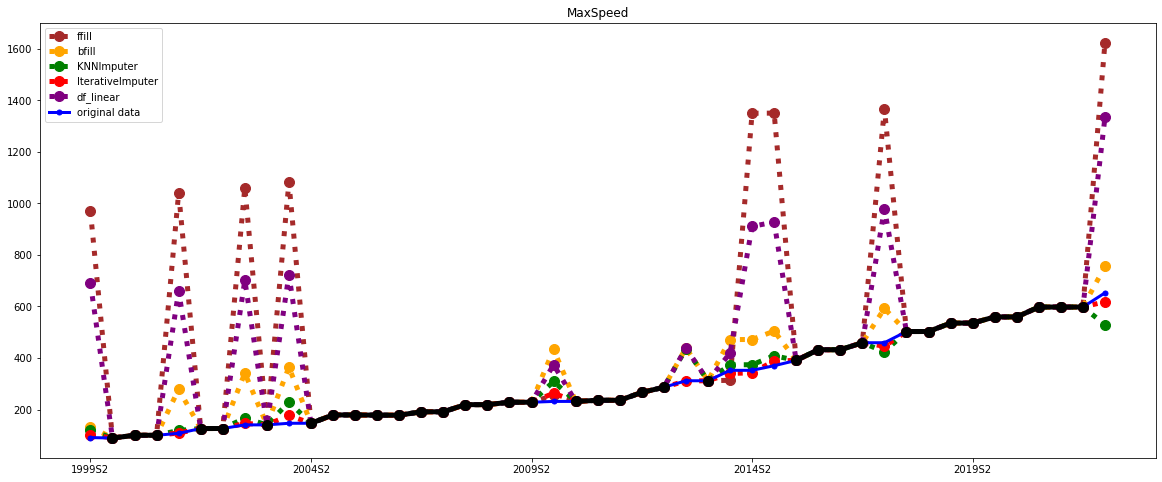

In [212]:
imputation_visual(df_minimum_wage_pps_missing_20, df_minimum_wage_pps_no_missing)

<p style="color:black; background-color:white; padding:5px;">The graph clearly shows why IterativeImputer is most accurate in the original form of the database. Because many of the models handle columns, they take previous and next values that don't make sense because they belong to other countries. In this case, bfill and ffill, instead of using previous and subsequent values of Bulgaria, use values from neighboring countries with much higher minimum wage levels. The same thing happened with the algorithm linear intepolation. However, the two algorithms IterativeImputer and KNNImputer even visually do quite well. Let's now look at what happens with the transposed version of the database.</p>

In [213]:
mask = np.random.choice([True, False], size=df_minimum_wage_pps_no_missing_T.shape, p=[0.2, 0.8])
mask[mask.all(),-1] = 0
df_minimum_wage_pps_missing_T20= df_minimum_wage_pps_no_missing_T.mask(mask)
df_minimum_wage_pps_missing_T20.head()

,AL,BE,BG,CZ,EE,EL,ES,FR,HU,LT,LU,LV,MT,NL,PL,PT,RO,SI,SK,US
1999S1,84.65,950.54,NaN,180.43,133.15,582.03,534.96,914.06,176.53,206.39,1039.97,NaN,631.59,995.41,289.78,NaN,56.20,449.31,NaN,760.92
1999S2,93.11,969.51,91.17,199.86,NaN,590.18,534.96,925.99,176.53,206.39,1039.97,145.26,631.59,NaN,289.78,433.14,72.26,449.31,NaN,760.92
2000S1,NaN,1004.55,89.38,219.82,148.94,603.62,546.54,951.06,188.74,210.45,1068.78,146.11,642.03,1040.52,280.45,449.84,NaN,467.30,202.59,756.85
2000S2,103.46,1004.55,100.05,247.30,148.94,612.66,546.54,981.69,188.74,NaN,1095.47,146.11,642.03,1058.43,NaN,449.84,80.94,484.59,202.59,756.85
2001S1,102.97,1020.93,100.06,278.59,161.91,634.63,559.04,1004.13,279.44,213.12,1110.09,NaN,652.77,NaN,313.70,NaN,90.12,498.73,NaN,754.21


In [173]:
def imputation_visual_T (df, df1 ): 
    df_fillna = df.copy()
    df_fillna.fillna(method='ffill',inplace=True)
    df_fillna.iloc[:,2].plot(color='brown', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_bfill = df.copy()
    df_bfill.fillna(method='bfill',inplace=True)
    df_bfill.iloc[:,2].plot(color='orange', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_knn = df.copy()
    knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")    
    df_knn1 = knn_imputer.fit_transform(df_knn)
    df_knn2 = pd.DataFrame(df_knn1, index=df_knn.index, columns=df_knn.columns)
    df_knn2 = df_knn2.round(1)
    df_knn2.iloc[:,2].plot(color='green', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_imp = df.copy()
    mice_imputer = IterativeImputer()
    df_imp1 = mice_imputer.fit_transform(df_imp)
    df_imp2 = pd.DataFrame(df_imp1, index=df_imp.index, columns=df_imp.columns)
    df_imp2 = df_imp2.round(1)
    df_imp2.iloc[:,2].plot(color='red', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)

    df_linear = df.copy()
    df_linear.interpolate(limit_direction="both",inplace=True)
    df_linear2 = pd.DataFrame(df_linear, index=df_linear.index, columns=df_linear.columns)
    df_linear2 = df_linear2.round(1)
    df_linear2.iloc[:,2].plot(color='purple', marker='o', linestyle='dotted', figsize=(20,8), lw=5, ms=10)
    df1.iloc[:,2].plot(title='MaxSpeed', marker='o', color='blue', figsize=(20,8), lw=3, ms=5)

    df.iloc[:,2].plot(title='MaxSpeed', marker='o', color='black', figsize=(20,8), lw=5, ms=10)
    plt.legend(['ffill', 'bfill', 'KNNImputer', 'IterativeImputer', 'df_linear', 'original data'])

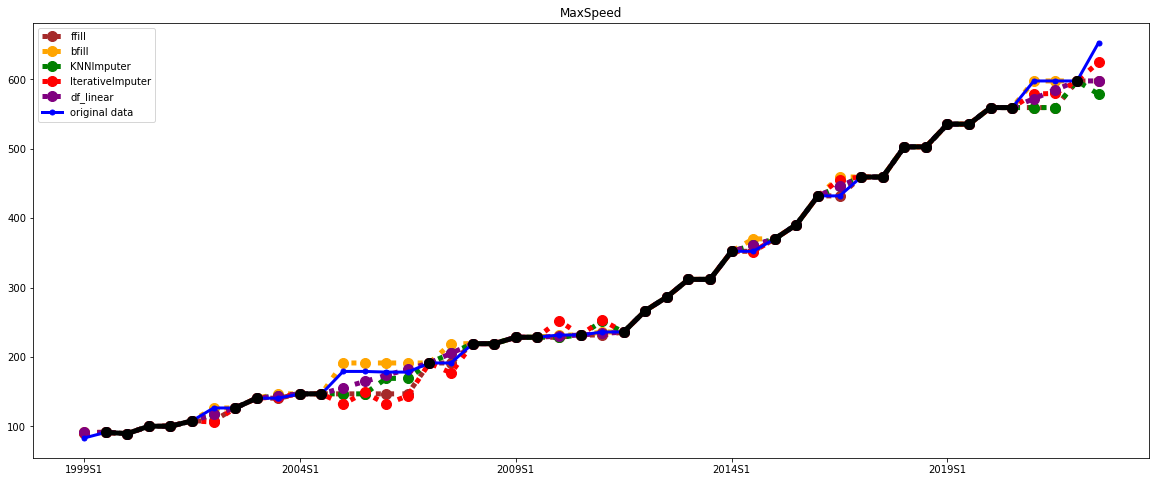

In [214]:
imputation_visual_T(df_minimum_wage_pps_missing_T20, df_minimum_wage_pps_no_missing_T)

<p style="color:black; background-color:white; padding:5px;">In this case, the problems with some of the algorithms no longer occur. All manage to some extent to provide logical real predictive value. It is difficult to compare the algorithms for the two versions of the database - the original and the transposed one, because the missed values in the form of missing are random. Let's avoid that and deliberately remove some of the values. For example, from the 2nd row, every 5th, as well as every fifth column starting with the second.</p>

In [206]:
df_minimum_wage_pps_missing_ = df_minimum_wage_pps_no_missing.copy()
df_minimum_wage_pps_no_missing1.iloc[2::5, 2::5] = np.nan
df_minimum_wage_pps_no_missing1

,geo\time,1999S1,1999S2,2000S1,2000S2,2001S1,2001S2,2002S1,2002S2,2003S1,...,2018S1,2018S2,2019S1,2019S2,2020S1,2020S2,2021S1,2021S2,2022S1,2022S2
74,AL,84.65,93.11,94.29,103.46,102.97,111.50,110.24,136.71,137.98,...,336.47,336.47,363.88,363.88,347.76,347.76,402.45,402.45,402.45,429.28
76,BE,950.54,969.51,1004.55,1004.55,1020.93,1041.35,1053.30,1074.34,1061.50,...,1362.77,1362.77,1387.68,1387.68,1399.21,1427.22,1432.92,1432.92,1461.58,1623.80
77,BG,83.00,NaN,89.38,100.05,100.06,107.66,NaN,126.34,140.47,...,502.79,502.79,535.52,NaN,559.40,559.40,597.76,597.76,NaN,652.93
80,CZ,180.43,199.86,219.82,247.30,278.59,278.59,307.00,307.00,341.30,...,642.85,642.85,692.29,692.29,729.60,729.60,743.72,743.72,792.65,792.65
83,EE,133.15,133.15,148.94,148.94,161.91,161.91,188.81,188.81,220.38,...,602.50,602.50,635.89,635.89,685.28,685.28,674.38,674.38,755.21,755.21
84,EL,582.03,590.18,603.62,612.66,634.63,644.14,675.91,688.07,699.71,...,787.50,787.50,788.78,874.80,859.41,859.41,868.02,868.02,885.39,952.15
85,ES,534.96,534.96,546.54,546.54,559.04,559.04,575.24,575.24,577.03,...,890.90,890.90,1093.11,1093.11,1136.70,1136.70,1142.27,1142.27,1160.31,1202.40
87,FR,914.06,NaN,951.06,981.69,1004.13,1044.86,NaN,1072.59,1039.32,...,1315.35,1315.35,1340.78,NaN,1361.32,1361.32,1380.79,1380.79,NaN,1461.62
89,HU,176.53,176.53,188.74,188.74,279.44,279.44,337.22,337.22,328.26,...,656.17,656.17,679.50,679.50,691.28,691.28,669.74,696.36,831.97,831.97
93,LT,206.39,206.39,210.45,210.45,213.12,213.12,219.87,219.87,233.27,...,592.57,592.57,811.86,811.86,862.76,862.76,892.51,892.51,1014.85,1014.85


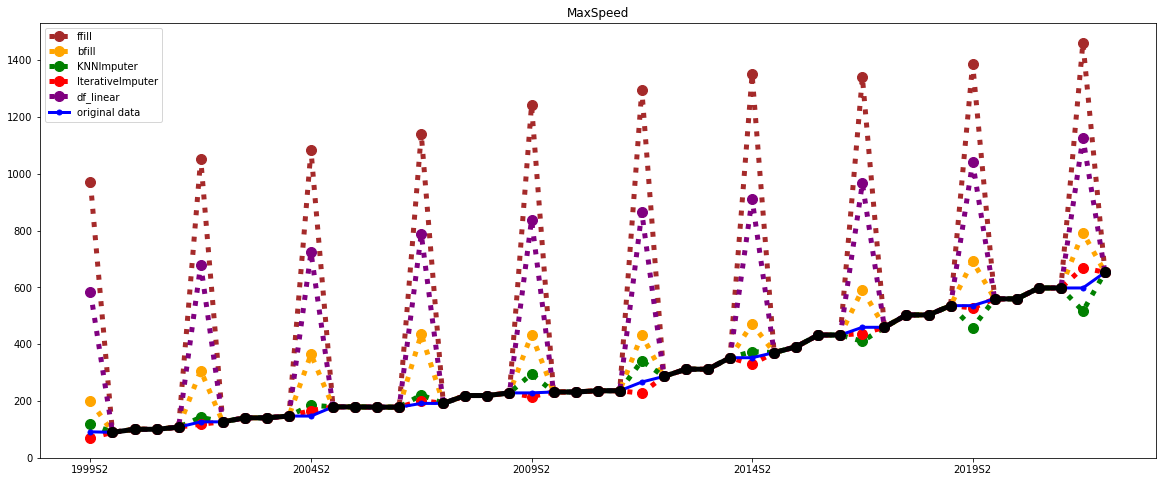

In [207]:
imp(df_minimum_wage_pps_no_missing1, df_minimum_wage_pps_no_missing)

In [208]:
df_minimum_wage_pps_no_missing_T1 = df_minimum_wage_pps_no_missing_T.copy()
df_minimum_wage_pps_no_missing_T1.iloc[2::5, 2::5] = np.nan
df_minimum_wage_pps_no_missing_T1

,AL,BE,BG,CZ,EE,EL,ES,FR,HU,LT,LU,LV,MT,NL,PL,PT,RO,SI,SK,US
1999S1,84.65,950.54,83.00,180.43,133.15,582.03,534.96,914.06,176.53,206.39,1039.97,145.26,631.59,995.41,289.78,433.14,56.20,449.31,159.84,760.92
1999S2,93.11,969.51,91.17,199.86,133.15,590.18,534.96,925.99,176.53,206.39,1039.97,145.26,631.59,1008.69,289.78,433.14,72.26,449.31,191.81,760.92
2000S1,94.29,1004.55,NaN,219.82,148.94,603.62,546.54,NaN,188.74,210.45,1068.78,146.11,NaN,1040.52,280.45,449.84,52.04,NaN,202.59,756.85
2000S2,103.46,1004.55,100.05,247.30,148.94,612.66,546.54,981.69,188.74,210.45,1095.47,146.11,642.03,1058.43,293.01,449.84,80.94,484.59,202.59,756.85
2001S1,102.97,1020.93,100.06,278.59,161.91,634.63,559.04,1004.13,279.44,213.12,1110.09,149.16,652.77,1078.33,313.70,466.01,90.12,498.73,225.39,754.21
2001S2,111.50,1041.35,107.66,278.59,161.91,644.14,559.04,1044.86,279.44,213.12,1137.83,179.00,652.77,1102.52,313.70,466.01,126.16,498.73,225.39,754.21
2002S1,110.24,1053.30,126.34,307.00,188.81,675.91,575.24,1047.47,337.22,219.87,1148.78,174.24,664.14,1126.20,315.42,473.37,103.78,534.56,248.05,751.16
2002S2,136.71,1074.34,NaN,307.00,188.81,688.07,575.24,NaN,337.22,219.87,1177.51,174.24,NaN,1149.72,315.42,473.37,129.73,NaN,248.05,751.16
2003S1,137.98,1061.50,140.47,341.30,220.38,699.71,577.03,1039.32,328.26,233.27,1223.52,194.85,714.33,1133.07,335.75,492.93,155.28,566.74,261.31,754.92
2003S2,147.67,1082.76,140.47,341.30,220.38,699.71,577.03,1094.10,328.26,233.27,1223.52,194.85,714.33,1147.22,335.75,492.93,155.28,566.74,261.31,754.92


In [209]:
df_minimum_wage_pps_no_missing_T.iloc[:,2]

1999S1     83.00
1999S2     91.17
2000S1     89.38
2000S2    100.05
2001S1    100.06
2001S2    107.66
2002S1    126.34
2002S2    126.34
2003S1    140.47
2003S2    140.47
2004S1    146.70
2004S2    146.70
2005S1    179.01
2005S2    179.01
2006S1    178.06
2006S2    178.06
2007S1    191.21
2007S2    191.21
2008S1    219.01
2008S2    219.01
2009S1    228.26
2009S2    228.26
2010S1    231.47
2010S2    231.47
2011S1    235.85
2011S2    235.85
2012S1    266.55
2012S2    286.30
2013S1    311.72
2013S2    311.72
2014S1    352.17
2014S2    352.17
2015S1    370.11
2015S2    390.67
2016S1    432.08
2016S2    432.08
2017S1    459.30
2017S2    459.30
2018S1    502.79
2018S2    502.79
2019S1    535.52
2019S2    535.52
2020S1    559.40
2020S2    559.40
2021S1    597.76
2021S2    597.76
2022S1    597.76
2022S2    652.93
Name: BG, dtype: float64

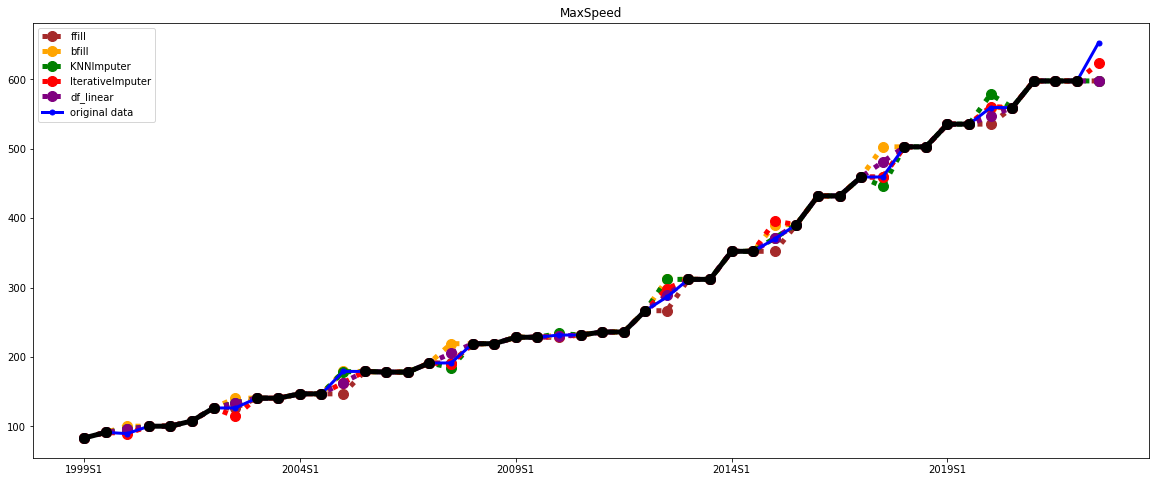

In [210]:
imp1(df_minimum_wage_pps_no_missing_T1, df_minimum_wage_pps_no_missing_T)